### ✅ Import Libraries


In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### ✅ Read Data

In [4]:
server = 'team12db.database.windows.net'
database = 'Team12_DB_Bank'
username = 'Mohamdd_Radi'
password = 'M1@2@3@4@5@6@7@8'
driver = '{ODBC Driver 17 for SQL Server}' 

conn = pyodbc.connect(
    f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}')



In [5]:
tables_df = pd.read_sql("""
    SELECT TABLE_NAME
    FROM INFORMATION_SCHEMA.TABLES
    WHERE TABLE_TYPE = 'BASE TABLE'
""", conn)

print(tables_df)


C:\Users\Nagy\AppData\Local\Temp\ipykernel_5800\1369372526.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables_df = pd.read_sql("""


      TABLE_NAME
0      Customers
1       Accounts
2   Transactions
3          Loans
4          Cards
5  Support_Calls
6    sysdiagrams


In [6]:
tables = [
    'Customers',
    'Accounts',
    'Cards',
    'Loans',
    'Transactions',
    'Support_Calls'
]

In [7]:
customers_df = pd.read_sql("SELECT * FROM Customers", conn)
Accounts_df = pd.read_sql("SELECT * FROM Accounts", conn)
Cards_df = pd.read_sql("SELECT * FROM Cards", conn)
Loans_df = pd.read_sql("SELECT * FROM Loans", conn)
Transactions_df = pd.read_sql("SELECT * FROM Transactions", conn)
support_calls_df = pd.read_sql("SELECT * FROM Support_Calls", conn)

C:\Users\Nagy\AppData\Local\Temp\ipykernel_5800\1652282627.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customers_df = pd.read_sql("SELECT * FROM Customers", conn)
C:\Users\Nagy\AppData\Local\Temp\ipykernel_5800\1652282627.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Accounts_df = pd.read_sql("SELECT * FROM Accounts", conn)
C:\Users\Nagy\AppData\Local\Temp\ipykernel_5800\1652282627.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Cards_df = pd.read_sql("SELECT * FROM Cards", conn)
C:\Users\Nagy\AppData\Loca

### ✅ Data Understanding

In [ ]:
customers_df.info()
customers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  5000 non-null   int64 
 1   FirstName   5000 non-null   object
 2   LastName    5000 non-null   object
 3   Phone       5000 non-null   object
 4   Email       5000 non-null   object
 5   Address     5000 non-null   object
 6   JoinDate    5000 non-null   object
dtypes: int64(1), object(6)
memory usage: 273.6+ KB


,CustomerID
count,5000.000000
mean,2500.500000
std,1443.520003
min,1.000000
25%,1250.750000
50%,2500.500000
75%,3750.250000
max,5000.000000


In [ ]:
Accounts_df.info()
Accounts_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AccountID    5000 non-null   int64 
 1   CustomerID   5000 non-null   int64 
 2   AccountType  5000 non-null   object
 3   Balance      5000 non-null   int64 
 4   CreatedDate  5000 non-null   object
dtypes: int64(3), object(2)
memory usage: 195.4+ KB


,AccountID,CustomerID,Balance
count,5000.000000,5000.000000,5000.000000
mean,2500.500000,2524.785800,49874.159000
std,1443.520003,1443.271697,28930.728486
min,1.000000,1.000000,147.000000
25%,1250.750000,1286.000000,24553.750000
50%,2500.500000,2498.500000,49672.000000
75%,3750.250000,3780.000000,75134.250000
max,5000.000000,5000.000000,99968.000000


In [ ]:
Cards_df.info()
Cards_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CardID          4000 non-null   int64 
 1   CustomerID      4000 non-null   int64 
 2   CardType        4000 non-null   object
 3   CardNumber      4000 non-null   int64 
 4   IssuedDate      4000 non-null   object
 5   ExpirationDate  4000 non-null   object
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


,CardID,CustomerID,CardNumber
count,4000.000000,4000.000000,4.000000e+03
mean,2000.500000,2520.864750,3.457716e+17
std,1154.844867,1444.975075,1.197985e+18
min,1.000000,1.000000,6.040209e+10
25%,1000.750000,1300.500000,1.800109e+14
50%,2000.500000,2495.000000,3.515435e+15
75%,3000.250000,3771.250000,4.672128e+15
max,4000.000000,5000.000000,4.999839e+18


In [ ]:
Loans_df.info()
Loans_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LoanID         2500 non-null   int64  
 1   CustomerID     2500 non-null   int64  
 2   LoanType       2500 non-null   object 
 3   LoanAmount     2500 non-null   float64
 4   InterestRate   2500 non-null   float64
 5   LoanStartDate  2500 non-null   object 
 6   LoanEndDate    2500 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 136.8+ KB


,LoanID,CustomerID,LoanAmount,InterestRate
count,2500.00000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2542.344000,246663.557200,7.480300
std,721.83216,1444.965374,144845.871557,2.863534
min,1.00000,1.000000,1099.000000,2.500000
25%,625.75000,1318.000000,121172.750000,5.040000
50%,1250.50000,2548.500000,245528.000000,7.460000
75%,1875.25000,3769.000000,370679.000000,9.940000
max,2500.00000,5000.000000,499756.000000,12.500000


In [ ]:
Transactions_df.info()
Transactions_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    20000 non-null  int64  
 1   AccountID        20000 non-null  int64  
 2   TransactionType  20000 non-null  object 
 3   Amount           20000 non-null  float64
 4   TransactionDate  20000 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 781.4+ KB


,TransactionID,AccountID,Amount
count,20000.000000,20000.000000,20000.000000
mean,10000.500000,2500.886000,5005.444508
std,5773.647028,1441.271585,2886.346765
min,1.000000,1.000000,10.180000
25%,5000.750000,1256.750000,2527.917500
50%,10000.500000,2503.000000,5011.605000
75%,15000.250000,3740.000000,7495.767500
max,20000.000000,5000.000000,9999.890000


In [ ]:
support_calls_df.info()
support_calls_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CallID      3000 non-null   int64 
 1   CustomerID  3000 non-null   int64 
 2   CallDate    3000 non-null   object
 3   IssueType   3000 non-null   object
 4   Resolved    3000 non-null   object
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


,CallID,CustomerID
count,3000.000000,3000.000000
mean,1500.500000,2468.874333
std,866.169729,1428.642970
min,1.000000,2.000000
25%,750.750000,1223.750000
50%,1500.500000,2435.500000
75%,2250.250000,3687.250000
max,3000.000000,4999.000000


### ✅ DATA CLEANING & Handling outliers

In [ ]:
# Customers Table

def clean_customers(df):
    df['FirstName'] = df['FirstName'].str.strip().str.title()
    df['LastName'] = df['LastName'].str.strip().str.title()
    df['Email'] = df['Email'].str.lower().str.strip()
    df['Phone'] = df['Phone'].fillna("Unknown")
    df['JoinDate'] = pd.to_datetime(df['JoinDate'], errors='coerce',format='%d/%m/%Y')
    return df


print(f"Number of customers after cleaning: {len(customers_df)}")

Number of customers after cleaning: 5000


In [10]:
# Accounts Table

def clean_accounts(df, customers_df):
    df = df[df['CustomerID'].isin(customers_df['CustomerID'])]
    df['Balance'] = pd.to_numeric(df['Balance'], errors='coerce').fillna(0)
    df = df[df['Balance'] >= 0]
    df['CreatedDate'] = pd.to_datetime(df['CreatedDate'], errors='coerce',format='%d/%m/%Y')
    return df


#  Remove accounts not linked to any existing customer
valid_customers = set(customers_df['CustomerID'])  

accounts_df = Accounts_df[Accounts_df['CustomerID'].isin(valid_customers)]

print(f"Number of accounts after cleaning: {len(accounts_df)}")


Number of accounts after cleaning: 5000


In [11]:
# Loans Table

def clean_loans(df, customers_df):
    df = df[df['CustomerID'].isin(customers_df['CustomerID'])]
    df['LoanAmount'] = pd.to_numeric(df['LoanAmount'], errors='coerce').fillna(0)
    df['InterestRate'] = pd.to_numeric(df['InterestRate'], errors='coerce').fillna(0)
    df['LoanStartDate'] = pd.to_datetime(df['LoanStartDate'], errors='coerce',format='%d/%m/%Y')
    df['LoanEndDate'] = pd.to_datetime(df['LoanEndDate'], errors='coerce',format='%d/%m/%Y')
    df = df[df['LoanEndDate'] >= df['LoanStartDate']]
    return df

# Use fixed date
today = pd.to_datetime("2024-01-01")

Loans_df['LoanStartDate'] = pd.to_datetime(Loans_df['LoanStartDate'])
Loans_df['LoanEndDate'] = pd.to_datetime(Loans_df['LoanEndDate'])

# Define active loans
active_loans = Loans_df[
    (Loans_df['LoanStartDate'] <= today) & 
    ((Loans_df['LoanEndDate'].isna()) | (Loans_df['LoanEndDate'] > today))
]

# Detect customers with multiple active loans
active_loan_counts = active_loans.groupby('CustomerID').size()
customers_multiple_active_loans = active_loan_counts[active_loan_counts > 1].index

# Remove all loans for those customers
loans_df = Loans_df[~Loans_df['CustomerID'].isin(customers_multiple_active_loans)]

print(f"Loans after removing customers with multiple active loans: {len(Loans_df)}")

Loans after removing customers with multiple active loans: 2500


In [12]:
# Transactions Table

def clean_transactions(df, accounts_df):
    df = df[df['AccountID'].isin(accounts_df['AccountID'])]
    df['TransactionType'] = df['TransactionType'].str.title().str.strip()
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce').fillna(0)
    df = df[df['Amount'] > 0]
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
    df = df[df['TransactionDate'] <= pd.Timestamp.today()]
    return df

#  Remove transactions with negative amounts (illogical)
Transactions_df = Transactions_df[Transactions_df['Amount'] >= 0]

# Calculate IQR (Interquartile Range)
Q1 = Transactions_df['Amount'].quantile(0.25)
Q3 = Transactions_df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Filter rows within the acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter values ​​within a range
Transactions_df = Transactions_df[(Transactions_df['Amount'] >= lower_bound) & (Transactions_df['Amount'] <= upper_bound)]


print(f"Transactions cleaned: total count = {len(Transactions_df)}")

Transactions cleaned: total count = 20000


In [13]:
# Cards Table

def clean_cards(df, customers_df):
    df = df[df['CustomerID'].isin(customers_df['CustomerID'])]
    df = df.drop_duplicates(subset='CardNumber')
    df['IssuedDate'] = pd.to_datetime(df['IssuedDate'], errors='coerce',format='%d/%m/%Y')
    df['ExpirationDate'] = pd.to_datetime(df['ExpirationDate'], errors='coerce',format='%d/%m/%Y')
    df = df[df['ExpirationDate'] >= df['IssuedDate']]
    return df

#  Remove cards not linked to any existing customer
valid_customers = set(customers_df['CustomerID'])
cards_df = Cards_df[Cards_df['CustomerID'].isin(valid_customers)]

#  Remove cards linked to more than one customer (logical error)
card_customer_counts = cards_df.groupby('CardNumber')['CustomerID'].nunique()
cards_with_multiple_customers = card_customer_counts[card_customer_counts > 1].index

cards_df = cards_df[~cards_df['CardNumber'].isin(cards_with_multiple_customers)]

print(f"Number of cards after removing logical duplicates: {len(cards_df)}")

Number of cards after removing logical duplicates: 4000


In [14]:
# SupportCalls Table
def clean_support_calls(df, customers_df):
    df = df[df['CustomerID'].isin(customers_df['CustomerID'])]
    df['CallDate'] = pd.to_datetime(df['CallDate'], errors='coerce',format='%d/%m/%Y')
    df['Resolved'] = df['Resolved'].replace({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0, True: 1, False: 0})
    df['Resolved'] = pd.to_numeric(df['Resolved'], errors='coerce').fillna(0).astype(int)
    df['IssueType'] = df['IssueType'].fillna('Unknown').str.title()
    return df

#  Standardize IssueType text formatting
support_calls_df['IssueType'] = (
    support_calls_df['IssueType']
    .str.replace("_", " ")
    .str.title()
    .str.strip()
)

#  Remove support calls not linked to any existing customer
support_calls_df = support_calls_df[support_calls_df['CustomerID'].isin(valid_customers)]

print(f"Number of support calls after cleaning: {len(support_calls_df)}")


Number of support calls after cleaning: 3000


In [15]:
Customers_df = clean_customers(customers_df)
Accounts_df = clean_accounts(Accounts_df, customers_df)
Transactions_df = clean_transactions(Transactions_df, Accounts_df)
Loans_df = clean_loans(Loans_df, customers_df)
Cards_df = clean_cards(Cards_df, customers_df)
Support_calls_df = clean_support_calls(support_calls_df, customers_df)

C:\Users\Nagy\AppData\Local\Temp\ipykernel_5800\4054014058.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Resolved'] = df['Resolved'].replace({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0, True: 1, False: 0})


## ✅ Handle missing Value

##### Simple forward-fill imputation for missing values

In [16]:

for df in [Transactions_df, Cards_df, Loans_df, Support_calls_df]:
    df.fillna(method='ffill', inplace=True)

print("Missing values handled with simple forward-fill imputation")


Missing values handled with simple forward-fill imputation


C:\Users\Nagy\AppData\Local\Temp\ipykernel_5800\1840021535.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [17]:
print("Missing values in Customers:")
print(customers_df.isnull().sum())
print("\nMissing values in Accounts:")
print(accounts_df.isnull().sum())



Missing values in Customers:
CustomerID    0
FirstName     0
LastName      0
Phone         0
Email         0
Address       0
JoinDate      0
dtype: int64

Missing values in Accounts:
AccountID      0
CustomerID     0
AccountType    0
Balance        0
CreatedDate    0
dtype: int64


In [18]:
print("\nMissing values in Cards:")
print(cards_df.isnull().sum())
print("\nMissing values in Loans:")
print(loans_df.isnull().sum())



Missing values in Cards:
CardID            0
CustomerID        0
CardType          0
CardNumber        0
IssuedDate        0
ExpirationDate    0
dtype: int64

Missing values in Loans:
LoanID           0
CustomerID       0
LoanType         0
LoanAmount       0
InterestRate     0
LoanStartDate    0
LoanEndDate      0
dtype: int64


In [19]:
print("\nMissing values in Transactions:")
print(Transactions_df.isnull().sum())
print("\nMissing values in Support Calls:")
print(support_calls_df.isnull().sum())


Missing values in Transactions:
TransactionID      0
AccountID          0
TransactionType    0
Amount             0
TransactionDate    0
dtype: int64

Missing values in Support Calls:
CallID        0
CustomerID    0
CallDate      0
IssueType     0
Resolved      0
dtype: int64


## ✅ Exploratory Data Analysis (EDA)

##### Overview of columns, data types, and missing values

In [20]:
customers_df.info()
accounts_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CustomerID  5000 non-null   int64         
 1   FirstName   5000 non-null   object        
 2   LastName    5000 non-null   object        
 3   Phone       5000 non-null   object        
 4   Email       5000 non-null   object        
 5   Address     5000 non-null   object        
 6   JoinDate    5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 273.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AccountID    5000 non-null   int64 
 1   CustomerID   5000 non-null   int64 
 2   AccountType  5000 non-null   object
 3   Balance      5000 non-null   int64 
 4   CreatedDate  5000 non-null   objec

In [21]:
cards_df.info()
loans_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CardID          4000 non-null   int64 
 1   CustomerID      4000 non-null   int64 
 2   CardType        4000 non-null   object
 3   CardNumber      4000 non-null   int64 
 4   IssuedDate      4000 non-null   object
 5   ExpirationDate  4000 non-null   object
dtypes: int64(3), object(3)
memory usage: 187.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1616 entries, 2 to 2499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   LoanID         1616 non-null   int64         
 1   CustomerID     1616 non-null   int64         
 2   LoanType       1616 non-null   object        
 3   LoanAmount     1616 non-null   float64       
 4   InterestRate   1616 non-null   float64       
 5   LoanStartDate  1616 non-nul

In [22]:
Transactions_df.info()
support_calls_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    20000 non-null  int64         
 1   AccountID        20000 non-null  int64         
 2   TransactionType  20000 non-null  object        
 3   Amount           20000 non-null  float64       
 4   TransactionDate  20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 781.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CallID      3000 non-null   int64 
 1   CustomerID  3000 non-null   int64 
 2   CallDate    3000 non-null   object
 3   IssueType   3000 non-null   object
 4   Resolved    3000 non-null   object
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


#####  Number of Customers Joined per Year


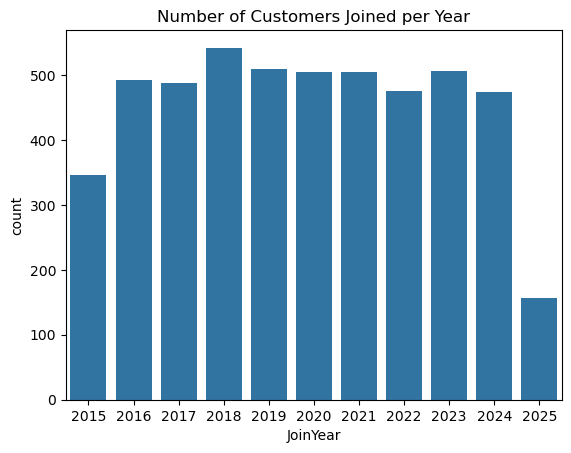

In [23]:
customers_df['JoinDate'] = pd.to_datetime(customers_df['JoinDate'])
customers_df['JoinYear'] = customers_df['JoinDate'].dt.year

sns.countplot(data=customers_df, x='JoinYear')
plt.title('Number of Customers Joined per Year')
plt.show()

##### Average Loan Amount by Type

C:\Users\Nagy\AppData\Local\Temp\ipykernel_5800\1282254995.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=loans_df, x='LoanType', y='LoanAmount', estimator=np.mean, ci=None)


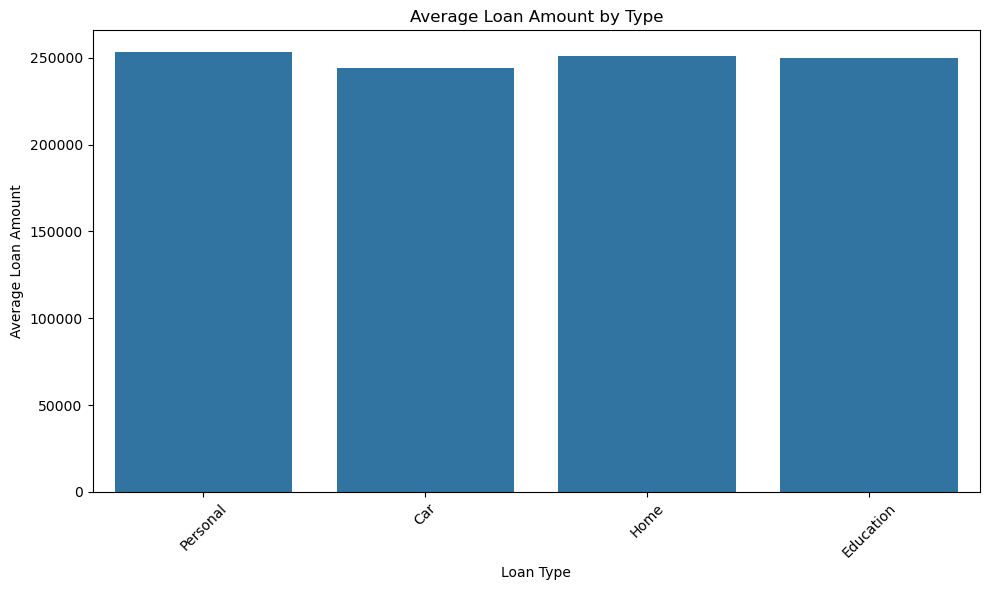

In [24]:
loans_df['LoanStartDate'] = pd.to_datetime(loans_df['LoanStartDate'])
loans_df['LoanEndDate'] = pd.to_datetime(loans_df['LoanEndDate'])

# Average Loan Amount by Type

plt.figure(figsize=(10,6))
sns.barplot(data=loans_df, x='LoanType', y='LoanAmount', estimator=np.mean, ci=None)
plt.title('Average Loan Amount by Type')
plt.xticks(rotation=45)
plt.ylabel('Average Loan Amount')
plt.xlabel('Loan Type')
plt.tight_layout()
plt.show()

#####  Compare card types by issue date

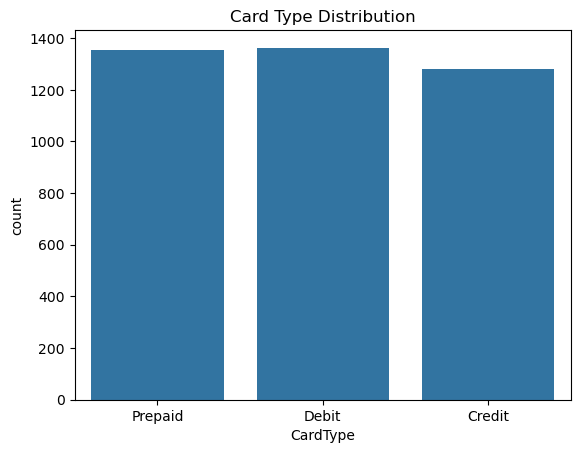

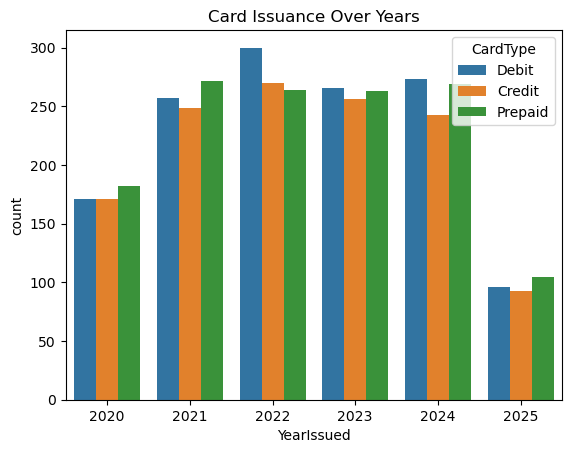

In [25]:
sns.countplot(data=cards_df, x='CardType')
plt.title('Card Type Distribution')
plt.show()

cards_df['IssuedDate'] = pd.to_datetime(cards_df['IssuedDate'])
cards_df['YearIssued'] = cards_df['IssuedDate'].dt.year
sns.countplot(data=cards_df, x='YearIssued', hue='CardType')
plt.title('Card Issuance Over Years')
plt.show()

##### Most Common Call Issues

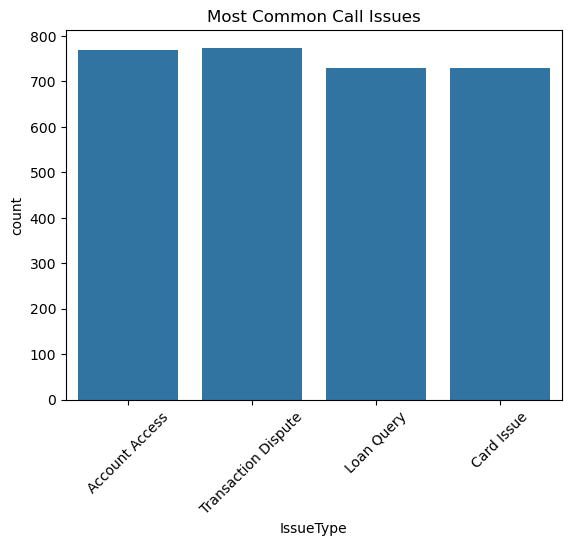

In [26]:
if support_calls_df is not None:
    support_calls_df['CallDate'] = pd.to_datetime(support_calls_df['CallDate'])
    support_calls_df['CallYear'] = support_calls_df['CallDate'].dt.year

    sns.countplot(data=support_calls_df, x='IssueType')
    plt.title('Most Common Call Issues')
    plt.xticks(rotation=45)
    plt.show()

##### Distribution of types of operations &  Average amount per transaction type

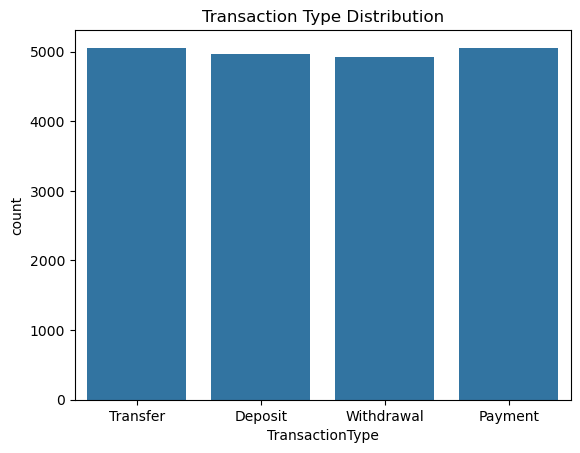

C:\Users\Nagy\AppData\Local\Temp\ipykernel_5800\1559839480.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Transactions_df, x='TransactionType', y='Amount', estimator=np.mean, ci=None)


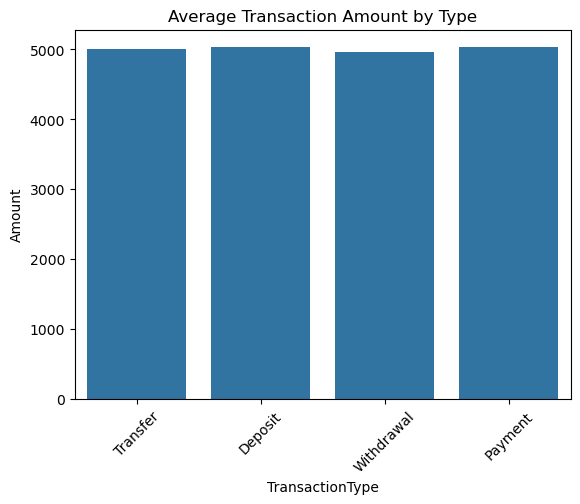

In [27]:
Transactions_df['TransactionDate'] = pd.to_datetime(Transactions_df['TransactionDate'])
Transactions_df['Month'] = Transactions_df['TransactionDate'].dt.month

sns.countplot(data=Transactions_df, x='TransactionType')
plt.title('Transaction Type Distribution')
plt.show()

sns.barplot(data=Transactions_df, x='TransactionType', y='Amount', estimator=np.mean, ci=None)
plt.title('Average Transaction Amount by Type')
plt.xticks(rotation=45)
plt.show()

##### Number of Transactions by Day of Week

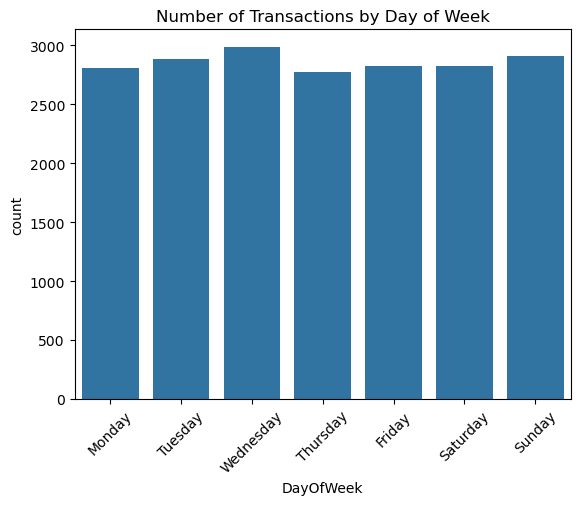

In [28]:
Transactions_df['TransactionDate'] = pd.to_datetime(Transactions_df['TransactionDate'])
Transactions_df['DayOfWeek'] = Transactions_df['TransactionDate'].dt.day_name()
Transactions_df['Month'] = Transactions_df['TransactionDate'].dt.month_name()

sns.countplot(data=Transactions_df, x='DayOfWeek', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Number of Transactions by Day of Week')
plt.xticks(rotation=45)
plt.show()

#####  Number of accounts per customer

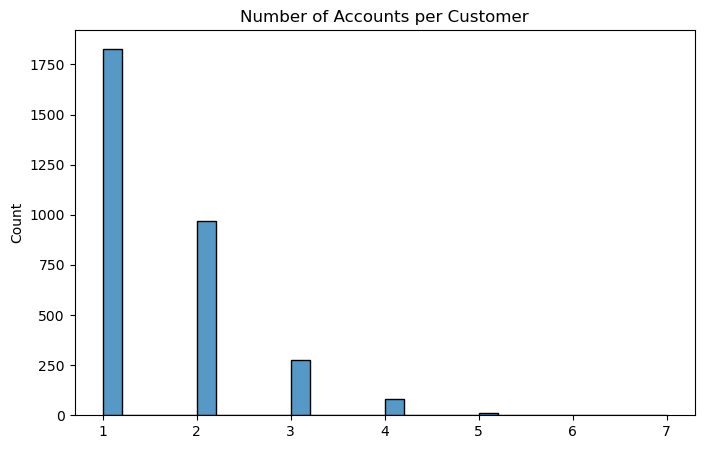

In [29]:

accounts_per_customer = accounts_df.groupby('CustomerID').size()
plt.figure(figsize=(8,5))
sns.histplot(accounts_per_customer, bins=30)
plt.title('Number of Accounts per Customer')
plt.show()

#####  Loan Amount distribution 

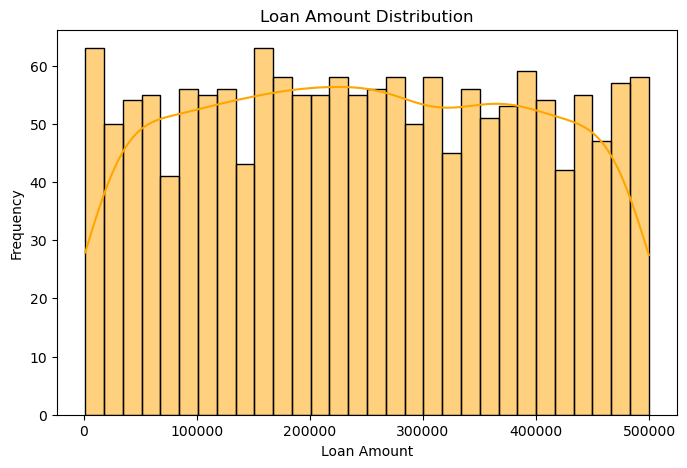

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(loans_df['LoanAmount'], bins=30, kde=True, color='orange')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

##### Loan Amount by Loan Type


C:\Users\Nagy\AppData\Local\Temp\ipykernel_5800\3401670070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loans_df, x='LoanType', y='LoanAmount', palette='pastel')


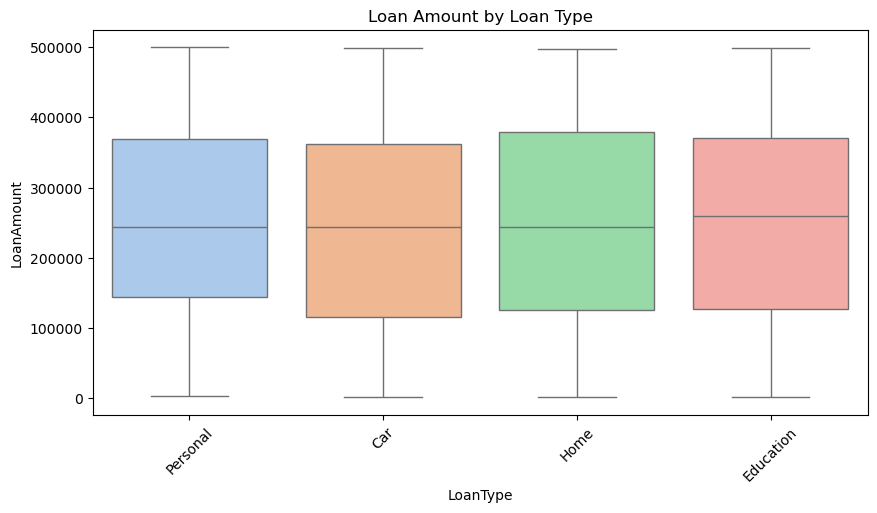

In [33]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=loans_df, x='LoanType', y='LoanAmount', palette='pastel')
plt.title('Loan Amount by Loan Type')
plt.xticks(rotation=45)
plt.show()


#####  Interest Rate distribution


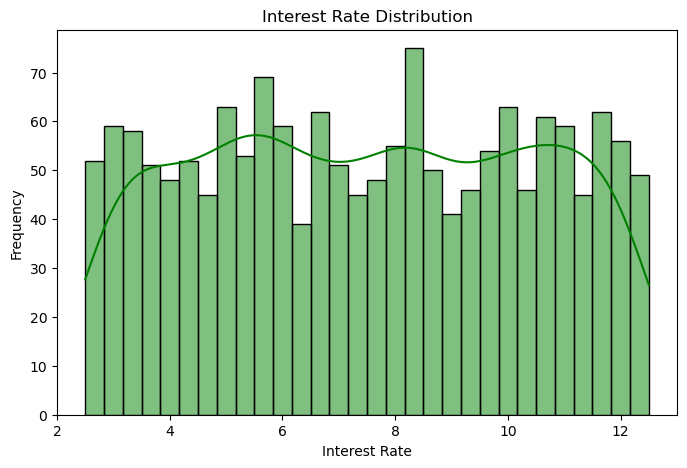

In [34]:

plt.figure(figsize=(8, 5))
sns.histplot(loans_df['InterestRate'], bins=30, kde=True, color='green')
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

#####  Most common support issues


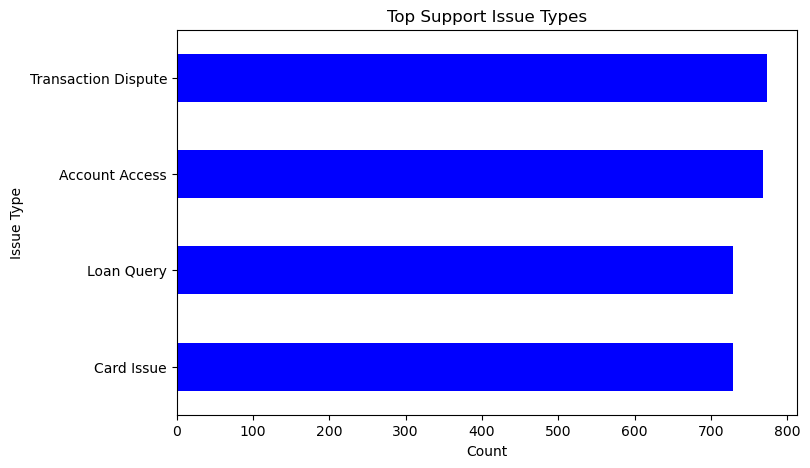

In [35]:

plt.figure(figsize=(8, 5))
support_calls_df['IssueType'].value_counts().head(10).plot(kind='barh', color='Blue')
plt.title('Top Support Issue Types')
plt.xlabel('Count')
plt.ylabel('Issue Type')
plt.gca().invert_yaxis()
plt.show()

##### Number of Loans per Customer


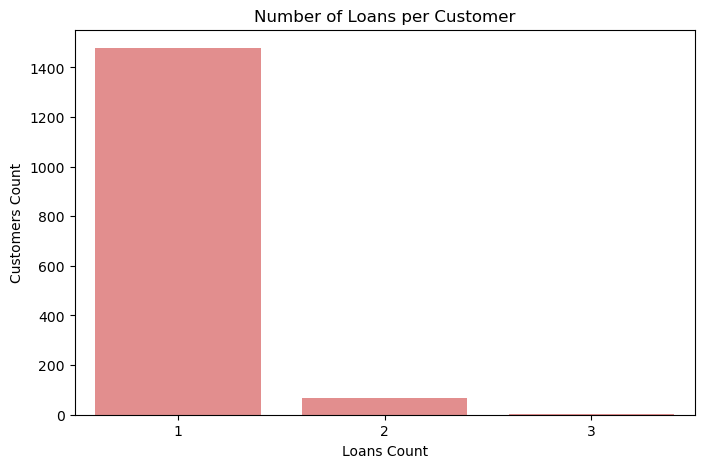

In [36]:

loan_counts = loans_df.groupby('CustomerID').size()

plt.figure(figsize=(8, 5))
sns.countplot(x=loan_counts, color='lightcoral')
plt.title('Number of Loans per Customer')
plt.xlabel('Loans Count')
plt.ylabel('Customers Count')
plt.show()


##### Support Call Volume by Issue Type 


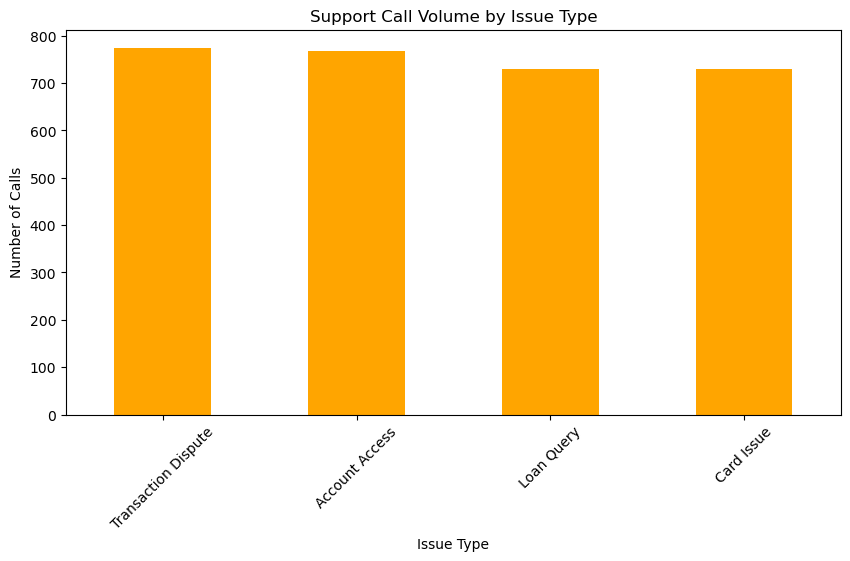

In [37]:

plt.figure(figsize=(10, 5))
support_calls_df['IssueType'].value_counts().plot(kind='bar', color='orange')
plt.title('Support Call Volume by Issue Type')
plt.xlabel('Issue Type')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.show()


##### Monthly Transaction Volume Over Time

C:\Users\Nagy\AppData\Local\Temp\ipykernel_5800\3786078398.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Mounthly_volume = Transactions_df.set_index('TransactionDate').resample('M')['Amount'].sum()


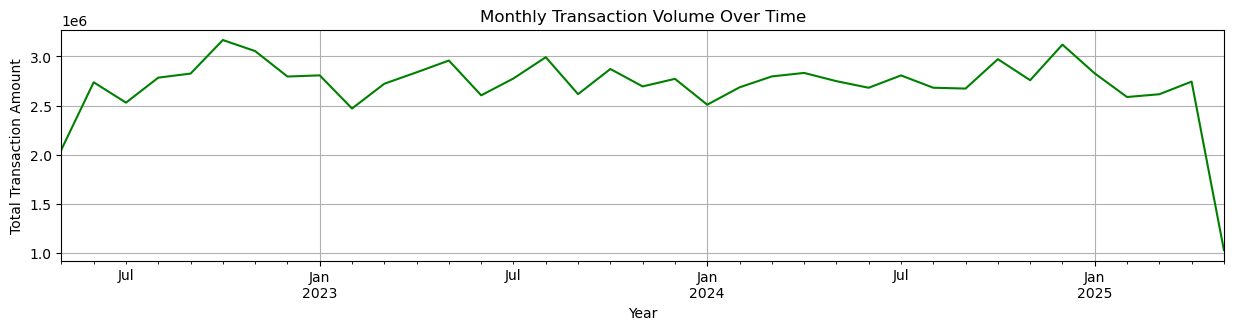

In [38]:
# Ensure the column is datetime
Transactions_df['TransactionDate'] = pd.to_datetime(Transactions_df['TransactionDate'])

Mounthly_volume = Transactions_df.set_index('TransactionDate').resample('M')['Amount'].sum()

plt.figure(figsize=(15, 3))
Mounthly_volume.plot(color='green')
plt.title('Monthly Transaction Volume Over Time')
plt.xlabel('Year')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.show()


## ✅ Export Data

In [ ]:
with pd.ExcelWriter('cleaned_data.xlsx', engine='xlsxwriter') as writer:
    Customers_df.to_excel(writer, sheet_name='Customers', index=False)
    Accounts_df.to_excel(writer, sheet_name='Accounts', index=False)
    Cards_df.to_excel(writer, sheet_name='Cards', index=False)
    Loans_df.to_excel(writer, sheet_name='Loans', index=False)
    Transactions_df.to_excel(writer, sheet_name='Transactions', index=False)
    Support_calls_df.to_excel(writer, sheet_name='Support_Calls', index=False)

In [ ]:
import os
print(os.getcwd())

c:\Users\Nagy\OneDrive - Mansoura University - Main\Desktop


In [ ]:
!pip install sqlalchemy pyodbc

In [ ]:
server = 'team12db.database.windows.net'
database = 'Team12_DB_Bank'
username = 'Mohamdd_Radi'
password = 'M1@2@3@4@5@6@7@8'
driver = '{ODBC Driver 17 for SQL Server}' 

conn = pyodbc.connect(
    f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}')

In [ ]:
tables_df = pd.read_sql("""
    SELECT TABLE_NAME
    FROM INFORMATION_SCHEMA.TABLES
    WHERE TABLE_TYPE = 'BASE TABLE'
""", conn)

print(tables_df)

      TABLE_NAME
0      Customers
1       Accounts
2   Transactions
3          Loans
4          Cards
5  Support_Calls
6    sysdiagrams


C:\Users\Nagy\AppData\Local\Temp\ipykernel_23488\3336117834.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables_df = pd.read_sql("""


In [ ]:
# drop these columns to different about our data
Customers_df.drop(columns=['JoinYear'],inplace=True)

In [ ]:
# pip install --upgrade sqlalchemy
!pip install sqlalchemy==1.4.48 --user

In [ ]:
# create new engine to store data 
from sqlalchemy import create_engine
import urllib

params = urllib.parse.quote_plus(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=team12db.database.windows.net;"
    "DATABASE=Team12_DB_Bank_Cleaned;"
    "UID=Mohamdd_Radi;"
    "PWD=M1@2@3@4@5@6@7@8"
)

engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")